In [2]:
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM
from keras.callbacks import EarlyStopping
#from keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np

# Load IMDb dataset
# This is a dataset of 25,000 movies reviews from IMDB, labeled by sentiment (positive/negative).
# Reviews have been preprocessed, and each review is encoded as a list of word indexes (integers).
# For convenience, words are indexed by overall frequency in the dataset,
# so that for instance the integer "3" encodes the 3rd most frequent word in the data.

(train_x, train_y), (test_x, test_y) = imdb.load_data(num_words=500) # 50'000 wäre typische Vokabgrösse, die viel einer Sprache abdeckt

# num_words: integer. Words are ranked by how often they occur (in the training set)
# and only the num_words most frequent words are kept.
# Any less frequent word will appear as oov_char value in the sequence data.


In [ ]:
# Padding sequences
# Transforms a list (of length num_samples) of sequences (lists of integers)
# into a 2D NumPy array of shape (num_samples, num_timesteps).
# num_timesteps is either the maxlen argument if provided, or the length
# of the longest sequence in the list.

train_x = pad_sequences(train_x, maxlen=100)
test_x = pad_sequences(test_x, maxlen=100)

In [7]:
# Model
model = Sequential([
    Embedding(input_dim=500, output_dim=32), # Vektorgrösse ist 32, die als input für das RNN weitergegeben wird
    SimpleRNN(units=32),
    Dense(units=1, activation='sigmoid')
])
# Compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# Fit model (train)
history = model.fit(train_x, train_y, epochs=25, batch_size=128, validation_split=0.2)

ValueError: Input 0 of layer "simple_rnn_3" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 32)

In [15]:
# Model
model = Sequential([
    Embedding(input_dim=500, output_dim=32),
    SimpleRNN(units=32, return_sequences=True),  # First SimpleRNN layer with return_sequences=True
    SimpleRNN(units=32, return_sequences=True), 
    SimpleRNN(units=32, return_sequences=True), 
    SimpleRNN(units=32, return_sequences=True), 
    SimpleRNN(units=32),  # Second SimpleRNN layer
    Dense(units=1, activation='sigmoid')
])
# Compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
callback = EarlyStopping(monitor='loss', patience=3)
# Fit model (train)
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2, callbacks=[callback])

Epoch 1/10
157/157 [==============================] - 20s 105ms/step - loss: 0.6986 - acc: 0.5066 - val_loss: 0.6995 - val_acc: 0.5070
Epoch 2/10
157/157 [==============================] - 16s 99ms/step - loss: 0.6074 - acc: 0.6700 - val_loss: 0.5909 - val_acc: 0.6960
Epoch 3/10
157/157 [==============================] - 16s 102ms/step - loss: 0.5178 - acc: 0.7494 - val_loss: 0.5079 - val_acc: 0.7544
Epoch 4/10
157/157 [==============================] - 16s 101ms/step - loss: 0.4881 - acc: 0.7718 - val_loss: 0.6257 - val_acc: 0.6484
Epoch 5/10
157/157 [==============================] - 16s 105ms/step - loss: 0.4749 - acc: 0.7783 - val_loss: 0.5239 - val_acc: 0.7498
Epoch 6/10
157/157 [==============================] - 15s 98ms/step - loss: 0.4416 - acc: 0.8033 - val_loss: 0.5982 - val_acc: 0.6848
Epoch 7/10
157/157 [==============================] - 16s 100ms/step - loss: 0.4190 - acc: 0.8148 - val_loss: 0.5933 - val_acc: 0.7110
Epoch 8/10
157/157 [==============================] - 15s

In [18]:
# Model
model = Sequential([
    Embedding(input_dim=500, output_dim=32),
    LSTM(units=32, return_sequences=True),  # First SimpleRNN layer with return_sequences=True
    LSTM(units=32, return_sequences=True), 
    LSTM(units=32, return_sequences=True), 
    LSTM(units=32, return_sequences=True), 
    LSTM(units=32),  # Second SimpleRNN layer
    Dense(units=1, activation='sigmoid')
])
# Compile
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
callback = EarlyStopping(monitor='loss', patience=3)
# Fit model (train)
history = model.fit(train_x, train_y, epochs=10, batch_size=128, validation_split=0.2, callbacks=[callback])

Epoch 1/10
157/157 [==============================] - 51s 275ms/step - loss: 0.6932 - acc: 0.5023 - val_loss: 0.6919 - val_acc: 0.5062
Epoch 2/10
157/157 [==============================] - 39s 248ms/step - loss: 0.5964 - acc: 0.6757 - val_loss: 0.5523 - val_acc: 0.7402
Epoch 3/10
157/157 [==============================] - 38s 245ms/step - loss: 0.4935 - acc: 0.7657 - val_loss: 0.4852 - val_acc: 0.7690
Epoch 4/10
157/157 [==============================] - 36s 226ms/step - loss: 0.4710 - acc: 0.7809 - val_loss: 0.5022 - val_acc: 0.7646
Epoch 5/10
157/157 [==============================] - 34s 219ms/step - loss: 0.4566 - acc: 0.7887 - val_loss: 0.4616 - val_acc: 0.7782
Epoch 6/10
157/157 [==============================] - 34s 219ms/step - loss: 0.4427 - acc: 0.7978 - val_loss: 0.4915 - val_acc: 0.7734
Epoch 7/10
157/157 [==============================] - 33s 213ms/step - loss: 0.4342 - acc: 0.7997 - val_loss: 0.4820 - val_acc: 0.7862
Epoch 8/10
157/157 [==============================] - 3

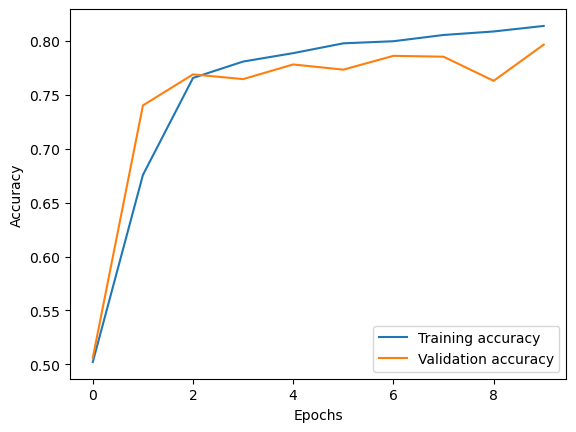

In [19]:
# Plot training history
plt.plot(history.history['acc'], label='Training accuracy')
plt.plot(history.history['val_acc'], label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [10]:
# Evaluation on training set
train_loss, train_acc = model.evaluate(train_x, train_y)
print("Training loss:", train_loss)
print("Training accuracy:", train_acc)

# Prediction and evaluation on training set
pred_train = model.predict(train_x)
pred_train = (pred_train > 0.5).astype('int32')
print("Confusion matrix (training set):")
print(np.column_stack((pred_train.flatten(), train_y)))

# Evaluation on test set
test_loss, test_acc = model.evaluate(test_x, test_y)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Prediction and evaluation on test set
pred_test = model.predict(test_x)
pred_test = (pred_test > 0.5).astype('int32')
print("Confusion matrix (test set):")
print(np.column_stack((pred_test.flatten(), test_y)))


782/782 [==============================] - 9s 11ms/step - loss: 0.3502 - acc: 0.8937
Training loss: 0.3502238988876343
Training accuracy: 0.8936799764633179
782/782 [==============================] - 9s 11ms/step
Confusion matrix (training set):
[[1 1]
 [0 0]
 [0 0]
 ...
 [1 0]
 [1 1]
 [0 0]]
782/782 [==============================] - 8s 10ms/step - loss: 1.1352 - acc: 0.7026
Test loss: 1.1351513862609863
Test accuracy: 0.7026399970054626
782/782 [==============================] - 8s 10ms/step
Confusion matrix (test set):
[[1 0]
 [0 1]
 [0 1]
 ...
 [1 0]
 [0 0]
 [0 0]]
